CSCI-P556: Applied Machine Learning
Fall 2018
Assignment #2
---



## Problem 1 (50 points)

In this problem you will be working with Bank Marketing Dataset. We encourage your to look at the description and make yourself comfortable with it: https://archive.ics.uci.edu/ml/datasets/bank+marketing

Two pairs of training and validation sets have been drawn from this dataset for you to work with, namely: 
 -  `train_1.csv` and `valid_1.csv`
 -  `train_2.csv`and `valid_2.csv`
 
Finally, we have also provided a `test.csv` which is common for both settings.


### Task 1 (Data Preprocessing) (12 points)

Before you can train a machine learning model using this dataset, you will have to run a number of preprocessing steps to transform the data into a form which will be acceptable to the model. In this task, you are supposed to carry out the follow steps:

1.  Find all features that have continuous numeric values and normalize them in the same way as you did in Assignment 1. List those features here.
2. Find all categorical features and process them as was discussed in class. List those features and explain what you did.
3. Are there any features which have missing values? (Hint: Missing values aren't always nicely represented and can be misleading sometimes). Find those features and explain how you will handle them.



Write your text-based answers here.


1.   Continuous numeric value function: 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'

2.   Categorical features: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'

3.   There are missing values in the 'pdays' feature. All these missing values are represented with '-1'. For handling the missing values in this feature, they are replaced with the mean value of all the values in that feature which are not -1 i.e which aren't the missing values. Thus, wherever there are missing values, the value assumed at that position is the mean for the reason that it must not favour any of the two target values.



In [2]:
def preprocess(file):
    import numpy as np
    import pandas as pd
    from collections import Counter    
    pd.set_option('mode.chained_assignment', None)
    data = pd.read_csv(file)
    X=data.iloc[:,:16]
    Y=data.iloc[:,-1]
    d=[]
    for i in X['pdays']:
        if i!=-1:
            d.append(i )
    for i in range(len(X['pdays'])):
        if X['pdays'][i]==-1:
            X['pdays'][i]=np.mean(np.asarray(d))
    x_num=X.select_dtypes(include=np.number)
    x_num=(x_num-np.mean(x_num))/np.std(x_num)
    for i in x_num.columns:
        X[i]=x_num[i]
    d=Counter(Y).keys()
    if len(d)==2:
        for j in range(len(Y)):
            if Y[j]=='yes':
                Y[j]=1
            else:
                Y[j]=0
    x_cat=X.select_dtypes(include=np.object)
    for i in x_cat.columns:
        d=Counter(x_cat[i]).keys()
        if len(d)==2:
            for j in range(len(x_cat[i])):
                if x_cat[i][j]=='yes':
                    X[i][j]=1
                else:
                    X[i][j]=0
        else:
            X1={}
            for a in d:
                X1[i+'_'+a]=[0]*len(x_cat)
            for j in range(len(x_cat)):
                X1[i+'_'+x_cat[i][j]][j]=1
            del X[i]
            for abc in X1:
                X[abc]=X1[abc]
    return X,Y

### Task 2 (Model $\mathcal{A}$) (10 points)

Train a logistic regression model with $L_2$ regularization on `train_1.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_1.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

𝜆= 8.155970977154007 
Accuracy for validation set= 0.7206142941523922


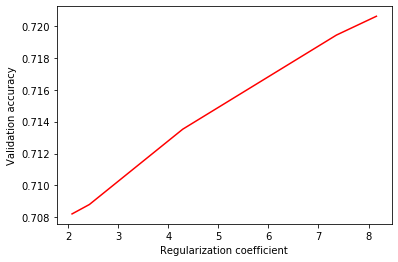

Accuracy for test dataset is= 0.7310627004312729


In [4]:
# PROBLEM 1, TASK 2 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import numpy as np
import random
X_trainA,y_trainA=preprocess('train_1.csv')
X_testA,y_testA=preprocess('valid_1.csv')
X_test,y_test=preprocess('test.csv')
y_trainA=y_trainA.astype('int')
y_testA=y_testA.astype('int')
y_test=y_test.astype('int')
cA=[]
for i in range(5):
    cA.append(random.uniform(0.001,10))
cA.sort()
accA=[]
for i in cA:
    accuracyA=[]
    LR = LogisticRegression(penalty = 'l2', C=1/i,solver='lbfgs',max_iter=500)
    LR.fit(X_trainA.values,y_trainA.values)    
    y_predA = LR.predict(X_testA.values)
    accuracyA.append(accuracy_score(y_testA, y_predA))
    accA.append(np.mean(accuracyA))
print('𝜆=',cA[accA.index(max(accA))],'\nAccuracy for validation set=',max(accA))
from matplotlib import pyplot as plt
plt.xlabel('Regularization coefficient')
plt.ylabel('Validation accuracy')
plt.plot(cA,accA, '-r')
plt.show()

LR = LogisticRegression(penalty = 'l2', C=1/cA[accA.index(max(accA))],solver='lbfgs',max_iter=500)
LR.fit(X_trainA.values,y_trainA.values)    
y_pred = LR.predict(X_test.values)
print('Accuracy for test dataset is=',accuracy_score(y_test, y_pred))

### Task 3 (Model $\mathcal{B}$) (5 points)
Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best regularization coefficient $\lambda$. Plot a curve with regularization coefficient in the X axis and the validation accuracy on the Y axis.

𝜆= 6.976790286222682 
Accuracy for validation set= 0.8920376002211777


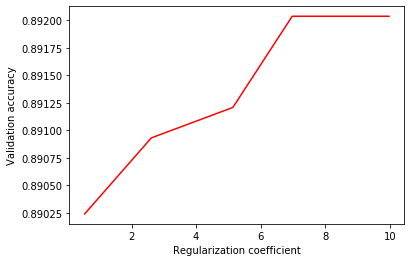

Accuracy for test dataset is= 0.8867632422868517


In [5]:
# PROBLEM 1, TBSK 2 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import model_selection
import random
X_trainB,y_trainB=preprocess('train_2.csv')
X_testB,y_testB=preprocess('valid_2.csv')
y_trainB=y_trainB.astype('int')
y_testB=y_testB.astype('int')
cB=[]
for i in range(5):
    cB.append(random.uniform(0.001,10))
cB.sort()
accB=[]
for i in cB:
    accuracyB=[]
    LR = LogisticRegression(penalty = 'l2', C=1/i,solver='lbfgs',max_iter=500)    
    LR.fit(X_trainB.values,y_trainB.values)    
    y_predB = LR.predict(X_testB.values)
    accuracyB.append(accuracy_score(y_testB, y_predB))
    accB.append(np.mean(accuracyB))

print('𝜆=',cB[accB.index(max(accB))],'\nAccuracy for validation set=',max(accB))
from matplotlib import pyplot as plt
plt.xlabel('Regularization coefficient')
plt.ylabel('Validation accuracy')
plt.plot(cB,accB,'-r')
plt.show()

LR = LogisticRegression(penalty = 'l2', C=1/cB[accB.index(max(accB))],solver='lbfgs',max_iter=500)
LR.fit(X_trainB.values,y_trainB.values)    
y_pred = LR.predict(X_test.values)
print('Accuracy for test dataset is=',accuracy_score(y_test, y_pred))

### Task 4 (Model $\mathcal{C}$) (10 points)

As you have seen in class, due to the specific (and smart) choice of the loss function, a logistic regression classifier happens to predict the posterioir probability $p(y|\mathbf{x})$ for any given sample. It then classifies the samples with $p(y|\mathbf{x}) > 0.5$ as belonging to class $1$ and the rest as belonging to class $0$. Instead, for a fixed threshold of $0.5$, let us consider a dynamic threshold of $\theta$ which can be chosen after a model has been trained.

$$
\ y=
\begin{cases}
1 \text{ if } p(y|\mathbf{x}) \geq \theta \\
\\
0 \text{ if } p(y|\mathbf{x}) < \theta \\
\end{cases}
$$

for $0 \leq \theta \leq 1$.

Train a logistic regression model with $L_2$ regularization on `train_2.csv` after applying the necessary preprocessing steps of Task 1. Use the validation set `valid_2.csv` to choose the best combination of regularization coefficient $\lambda$ and the threshold $\theta$. The best coefficients has to be selected by you after trying out at least five, non-consecutive values. Visualize all these runs.

**Hint**: Look at the documentation of Logistic Regression in sci-kit learn to come up with a plan to implement this.

For 𝜃= 0.39984332850896653 :


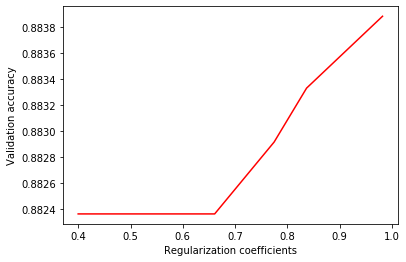

For 𝜃= 0.6609920865707114 :


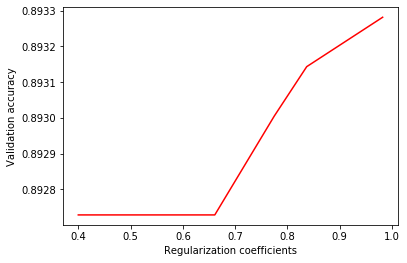

For 𝜃= 0.7747732525724847 :


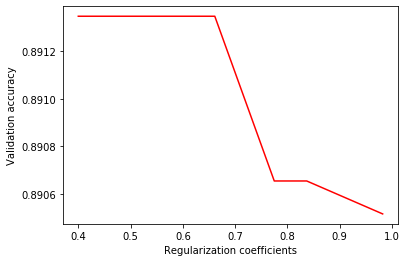

For 𝜃= 0.8368551409808478 :


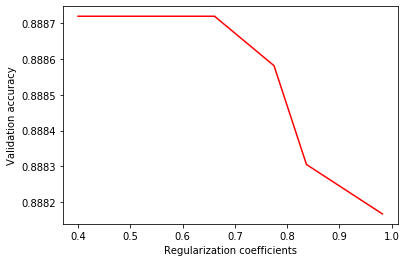

For 𝜃= 0.9821613466675695 :


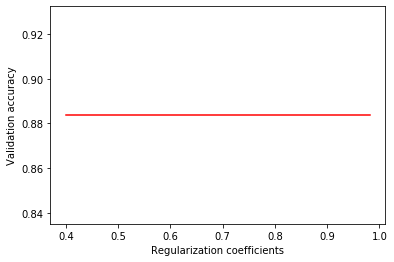

Best combination:
𝜆 value= 9.058309789743316
𝜃 value= 0.6609920865707114
Accuracy for validation set= 0.8932817251866187
Accuracy for test dataset = 0.8918993641139066


In [7]:
# PROBLEM 1, TASK 4 CODE GOES HERE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

X_train,y_train=preprocess('train_2.csv')
y_train=y_train.astype('int')
X_test,y_test=preprocess('valid_2.csv')
y_test=y_test.astype('int')
y_pred=[0]*len(y_test)
c=[]
for i in range(5):
    c.append(random.uniform(0.001,10))
c.sort()
thresh=[]
for i in range(5):
    thresh.append(random.uniform(0.1,1))
thresh.sort()
dictionary={}
for i in thresh:
    dictionary[i]=[]
s=[]
t=[]
for l in c:
    acc=[]
    LR = LogisticRegression(max_iter=500,penalty='l2', C=1/l,solver='lbfgs')
    LR.fit(X_train,y_train)
    pro=LR.predict_proba(X_test)[:,1]    
    for  prob in thresh:
        for i in range(len(pro)):
            if pro[i]>=prob:
                y_pred[i]=1
            else:
                y_pred[i]=0
        acc.append(accuracy_score(y_test, y_pred))
        dictionary[prob].append(accuracy_score(y_test, y_pred))
    s.append(max(acc))
    t.append(thresh[acc.index(max(acc))])
for i in dictionary:
    print('For 𝜃=',i,':')
    plt.xlabel('Regularization coefficients')
    plt.ylabel('Validation accuracy')
    plt.plot(thresh,dictionary[i], '-r')
    plt.show()
    
print('Best combination:')
print('𝜆 value=',c[s.index(max(s))])
print('𝜃 value=',t[s.index(max(s))])
print('Accuracy for validation set=',max(s))

LR = LogisticRegression(penalty = 'l2', C=1/c[s.index(max(s))],solver='lbfgs',max_iter=500)
LR.fit(X_train,y_train)    
y_pred = LR.predict(X_test.values)
print('Accuracy for test dataset =',accuracy_score(y_test, y_pred))

## Problem 2 (50 points)

Consider a regression problem in which the input variable $x$ has only one feature and the target variable $y$ is generated from the input variable $x$ by a polynomial $f(x)$. The function $f$ is such that $$f(x) = \sum_{i=0}^d w_ix^i$$ Please note that a given polynomial function can be completely described by the vector of coefficients $\mathbf{w}$.

### Task 1 (5 points)

Write a function in python which can take the degree of polynomial function as input. The code to generate vector coefficeints $\mathbf{w}$ using this input is already provided. Plot the resulting function for $x \in (-low, high)$. The function should be plot 

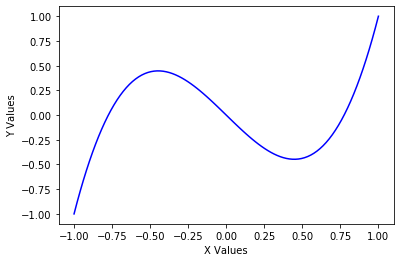

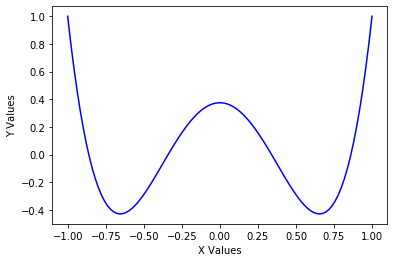

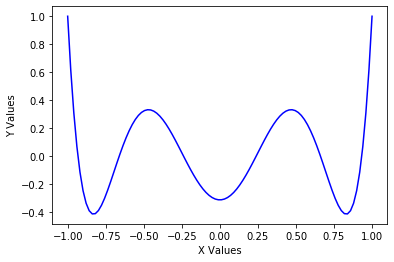

In [12]:
import numpy as np
from scipy.special import legendre

def get_coefficients(degree):
    """
    The coefficients returned are in the order w_0, w_1, ... , w_{degree}
    """
    return legendre(degree).coefficients[::-1]

def visualize_function(degree, low, high):
    w = get_coefficients(degree)
    from matplotlib import pyplot as plt
    x = np.linspace(low,high,100,dtype=float)
    y=sum(w[i]*pow(x,i)  for i in range(len(w)))
    plt.plot(x, y, '-b')
    plt.xlabel('X Values')
    plt.ylabel('Y Values')
    plt.show()
    pass
## TEST CASES (The following lines should plot a function)
visualize_function(3, -1, 1)
visualize_function(4, -1, 1)
visualize_function(6, -1, 1)

### Task 2 (5 points)

Write a function in python that randomly generates a dataset (training data + test data). The function should take the degree of target polynomial as input along with the number of points that should be generated for both the training and the test sets. The polynomial will be represented by the vector of coefficients. The code to calculate these coefficients has been provided. The function should also add random normal noise to the target -- i.e. the noise should be drawn from a normal distribution with mean $\mu=0$ and standard deviation = $\sigma^2$. Thus: 
$$y=\sum_{i=0}^d w_ix^i + \mathcal{N}(0, \sigma^2)$$



In [87]:
def generate_dataset(degree, n_train, n_test, sigma):
    """
    - n_train - Number of training samples
    - n_test - Number of test samples
    - X_train is an array of size (n_train $\times$ 1)
    - y_train is an array of size (n_train $\times$ 1)
    - X_test is an array of size (n_test $\times$ 1)
    - y_test is an array of size (n_test $\times$ 1)
    """
    w = get_coefficients(degree)
    import random
    import numpy as np
    X_train=[]
    y_train=[]
    X_test=[]
    y_test=[]
    for i in range(n_train):
        X_train.append(random.uniform(-2,2))
    for j in X_train:
        y_train.append((sum(w[i]*pow(j,i)  for i in range(len(w))))+np.random.normal(0,sigma))
    for i in range(n_test):
        X_test.append(random.uniform(-2,2))
    for j in X_test:
        y_test.append((sum(w[i]*pow(j,i) for i in range(len(w))))+np.random.normal(0,sigma))
    return X_train, y_train, X_test, y_test

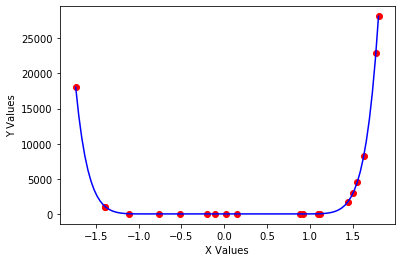

Degree of dataset= 10

Errors:
          Training     Testing
Model A  5301.1838   9579.7353
Model B     0.1901  10780.6424


In [89]:
def poly_fit(degree,x):
        a=[]
        for i in x:
                a.append([pow(i,p) for p in range(degree+1)])
        a=np.asarray(a)
        a=a.reshape(len(x),degree+1)
        return a

X_train, y_train, X_test, y_test=generate_dataset(10,20,20,0.2)

from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,color='red')
visualize_function(10,min(X_train), max(X_train))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train=np.asarray(X_train)
X_test=np.asarray(X_test)

##Model A
LRA = LinearRegression()
X_trainA=poly_fit(2,X_train)  
LRA.fit(X_trainA, y_train)
y_pred1=LRA.predict(X_trainA)
e1=np.sqrt(mean_squared_error(y_train,y_pred1))
x_testA=poly_fit(2,X_test)
LRA.fit(x_testA, y_test)
y_pred2=LRA.predict(x_testA)
e2=np.sqrt(mean_squared_error(y_test,y_pred2))

##Model B
LRB = LinearRegression()
X_trainB=poly_fit(10,X_train)
LRB.fit(X_trainB, y_train)
y_pred3=LRB.predict(X_trainB)
e3=np.sqrt(mean_squared_error(y_train,y_pred3))
x_testB=poly_fit(10,X_train)
LRB.fit(x_testB, y_test)
y_pred4=LRB.predict(x_testB)
e4=np.sqrt(mean_squared_error(y_test,y_pred4))

print('Degree of dataset= 10')
print("\nErrors:")
print(pd.DataFrame.from_dict({'Model A':['%0.4f'%e1,'%0.4f'%e2],'Model B':['%0.4f'%e3,'%0.4f'%e4]}, orient='index',columns=['Training','Testing']))

### Task 4 (20 points)

1.  Use the function written in Task 2 to generate a dataset of degree 45, with 20 samples each in the training and test sets. There should be no noise in the samples.
2.  Repeat steps 2 to 4 from Task 3 for this dataset.

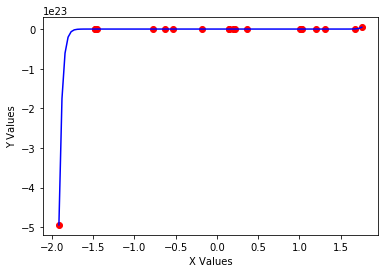

Degree of dataset= 45

Errors:
                             Training                      Testing
Model A  83663323675834842087424.0000   922740332269035585536.0000
Model B    203497487104018972672.0000  1079148020357502599168.0000


In [90]:
X_train, y_train, X_test, y_test=generate_dataset(45,20,20,0)

from matplotlib import pyplot as plt
plt.scatter(X_train,y_train,color='red')
visualize_function(45,min(X_train), max(X_train))

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

X_train=np.asarray(X_train)
X_test=np.asarray(X_test)

#Model A
LRA1 = LinearRegression()
X_trainA1=poly_fit(2,X_train)
LRA1.fit(X_trainA1, y_train)
y_pred5=LRA1.predict(X_trainA1)
e5=np.sqrt(mean_squared_error(y_train,y_pred5))
x_testA1=poly_fit(2,X_test)
LRA1.fit(x_testA1, y_test)
y_pred6=LRA1.predict(x_testA1)
e6=np.sqrt(mean_squared_error(y_test,y_pred6))


#Model B
LRB1 = LinearRegression()
X_trainB1=poly_fit(10,X_train)
LRB1.fit(X_trainB1, y_train)
y_pred7=LRB1.predict(X_trainB1)
e7=np.sqrt(mean_squared_error(y_train,y_pred7))
x_testB1=poly_fit(10,X_train)
LRB1.fit(x_testB1, y_test)
y_pred8=LRB1.predict(x_testB1)
e8=np.sqrt(mean_squared_error(y_test,y_pred8))

print('Degree of dataset= 45')
print("\nErrors:")
print(pd.DataFrame.from_dict({'Model A':['%0.4f'%e5,'%0.4f'%e6],'Model B':['%0.4f'%e7,'%0.4f'%e8]}, orient='index',columns=['Training','Testing']))